In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', 1000)

In [3]:
tweets=pd.read_csv('TweetsElonMusk.csv')

In [4]:
# His first tweet is interesting. It is why this date was selected as the start date of his tweets history
tweets['tweet'][0]

'Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me.'

**Important Note**
With further EDA and research, I realized that the first trading day for Tesla's stock was on June 29, 2010 so it is not possible to get the stock price for June 4, 2010! 

In [5]:
tweets.retweet.unique()

array([False])

### Defining a function to Remove URLs/Mentions from tweets

In [6]:
import re
# Regular expression pattern to match URLs
url_pattern = r'https?://\S+'

def tweets_without_urls(x):
    return re.sub(url_pattern, '', x)

# Example string
test = "ride bumper cars on ice!  No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)  http://t.co/rBQXJ9IT"

tweets_without_urls(test)

"ride bumper cars on ice!  No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)  "

In [7]:
tweets['tweet']=tweets['tweet'].apply(lambda x: tweets_without_urls(x))

In [8]:
# Example string
s = 'Production Autopilot is already above @Taraaaa that for highway driving., @RationalEtienne be aware  @F9Block5 While aadg'

# Regular expression pattern to match mentions
mention_pattern = r'@\w+\s?'


def tweets_without_mentions(x):
      return re.sub(mention_pattern, '', x)
    
tweets_without_mentions(s)    

'Production Autopilot is already above that for highway driving., be aware  While aadg'

In [9]:
tweets['tweet']=tweets['tweet'].apply(lambda x: tweets_without_mentions(x))

## Dropping unnecessary columns

In [10]:
#Drop all the cols that include only null values
tweets.dropna(axis=1, how='all', inplace=True)

In [11]:
# find columns with only one unique value
unique_cols = tweets.columns[tweets.nunique() == 1]

unique_cols

Index(['timezone', 'user_id', 'username', 'name', 'retweet'], dtype='object')

In [12]:
#Dropping columns with one unique value
tweets.drop(unique_cols, axis=1, inplace=True)

In [13]:
#Removing redundant cols
tweets.drop(['id','conversation_id','time','photos'], axis=1, inplace=True)

In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      12562 non-null  object
 1   date            12562 non-null  object
 2   tweet           12562 non-null  object
 3   language        12562 non-null  object
 4   mentions        12562 non-null  object
 5   urls            12562 non-null  object
 6   replies_count   12562 non-null  int64 
 7   retweets_count  12562 non-null  int64 
 8   likes_count     12562 non-null  int64 
 9   hashtags        12562 non-null  object
 10  cashtags        12562 non-null  object
 11  link            12562 non-null  object
 12  quote_url       410 non-null    object
 13  video           12562 non-null  int64 
 14  thumbnail       792 non-null    object
 15  reply_to        12562 non-null  object
dtypes: int64(4), object(12)
memory usage: 1.5+ MB


### Editing Date Col as its format is not consistant

In [15]:
tweets['date']=tweets['created_at'].apply(lambda x: x[0:10])

In [16]:
tweets = tweets.rename(columns={'date':'Date'})

In [17]:
tweets.head()

,created_at,Date,tweet,language,mentions,urls,replies_count,retweets_count,likes_count,hashtags,cashtags,link,quote_url,video,thumbnail,reply_to
0,2010-06-04 21:31:57 EEST,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",en,[],[],398,349,4710,[],[],https://twitter.com/elonmusk/status/15434727182,NaN,0,NaN,[]
1,2011-12-01 12:29:04 EET,2011-12-01,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,en,[],['http://ow.ly/i/mtD7'],31,9,79,[],[],https://twitter.com/elonmusk/status/142188458125963264,NaN,0,NaN,[]
2,2011-12-01 11:55:11 EET,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)",en,[],[],31,16,191,[],[],https://twitter.com/elonmusk/status/142179928203460608,NaN,1,https://pbs.twimg.com/media/Afkf5DMCAAEJGFr.jpg,[]
3,2011-12-03 10:22:07 EET,2011-12-03,That was a total non sequitur btw,en,[],[],29,6,52,[],[],https://twitter.com/elonmusk/status/142881284019060736,NaN,0,NaN,[]
4,2011-12-03 10:20:28 EET,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",en,[],[],7,24,30,[],[],https://twitter.com/elonmusk/status/142880871391838208,NaN,0,NaN,[]


## Checking the remaining columns

In the next step, I would go over each column to see how to use that col

In [18]:
# reviewing language col
tweets['language'].unique()

array(['en', 'und', 'it', 'de', 'nl', 'es', 'et', 'da', 'in', 'ja', 'hi',
       'fr', 'pl', 'ro', 'vi', 'ca', 'cy', 'tr', 'sl', 'pt', 'lt', 'tl',
       'fi', 'eu', 'ht', 'sv', 'ru', 'no', 'is', 'lv', 'cs', 'hu', 'sr',
       'uk'], dtype=object)

In [19]:
tweets['language'].value_counts()

en     11138
und     1050
tl       108
fr        38
de        35
es        29
in        24
ru        15
nl        14
pt        11
it        10
et         9
pl         9
tr         7
da         7
lt         6
ca         6
cy         5
hi         5
ht         4
ro         4
no         4
is         3
sl         3
ja         3
sv         3
cs         2
lv         2
vi         2
fi         2
eu         1
hu         1
sr         1
uk         1
Name: language, dtype: int64

In [20]:
#tweets are written in diff languages. As en is the most frequent one (above 90%), we only keep english tweets
tweets = tweets[tweets['language'] == 'en']

In [21]:
#Removing language cols
tweets.drop(['language'], axis=1, inplace=True)

In [22]:
# reviewing cashtag col
tweets['cashtags'].unique()

array(['[]', "['tsla']"], dtype=object)

In [23]:
tweets['cashtags'].value_counts()

[]          11137
['tsla']        1
Name: cashtags, dtype: int64

In [24]:
tweets[tweets['cashtags'].str.contains('tsla')]

,created_at,Date,tweet,mentions,urls,replies_count,retweets_count,likes_count,hashtags,cashtags,link,quote_url,video,thumbnail,reply_to
1005,2015-03-16 20:12:56 EET,2015-03-16,Some people seem to think I tweet to affect share price. This is false. A brief rise in $TSLA stock obviously does no good for Tesla or me.,[],[],139,618,1411,[],['tsla'],https://twitter.com/elonmusk/status/577533020736909312,NaN,0,NaN,[]


In [25]:
tweets['tweet'][1005]

'Some people seem to think I tweet to affect share price. This is false. A brief rise in $TSLA stock obviously does no good for Tesla or me.'

Link to this [tweet](https://twitter.com/elonmusk/status/577533020736909312)

In [26]:
#Removing cashtags col
tweets.drop(['cashtags'], axis=1, inplace=True)

In [27]:
#Hashtag Col
tweets['hashtags'].unique()

array(['[]', "['whatcouldpossiblygowrong']", "['plutostamp']",
       "['antarctica']", "['apspacechat']",
       "['occupymars', 'apspacechat']", "['dragonlaunch']",
       "['grasshopperproject']", "['dragon']", "['occupymars']",
       "['climate']", "['awesomexmasgifts']", "['zeitgeist2012']",
       "['sb47']", "['sxsw']", "['teslatx']", "['hhgttg']",
       "['katiewoodencloak']", "['yutu']", "['falconheavy']",
       "['falconheavy', 'spacex']", "['throwflamesresponsibly']",
       "['moneygang']", "['armageddon69']", "['deletefacebook']",
       "['justiceforgeorge']", "['resistanceisfutile']", "['mars']"],
      dtype=object)

In [28]:
tweets['hashtags'][40][2:-2]

'whatcouldpossiblygowrong'

In [29]:
# With the scope of this project, this column is not needed
tweets.drop(['thumbnail'], axis=1, inplace=True)

In [30]:
tweets['hashtags']=tweets['hashtags'].apply(lambda x: x[2:-2])

In [31]:
tweets['hashtags'].unique()

array(['', 'whatcouldpossiblygowrong', 'plutostamp', 'antarctica',
       'apspacechat', "occupymars', 'apspacechat", 'dragonlaunch',
       'grasshopperproject', 'dragon', 'occupymars', 'climate',
       'awesomexmasgifts', 'zeitgeist2012', 'sb47', 'sxsw', 'teslatx',
       'hhgttg', 'katiewoodencloak', 'yutu', 'falconheavy',
       "falconheavy', 'spacex", 'throwflamesresponsibly', 'moneygang',
       'armageddon69', 'deletefacebook', 'justiceforgeorge',
       'resistanceisfutile', 'mars'], dtype=object)

In [32]:
# Define a function to remove punctuation when converting them to string
import string

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [33]:
tweets['hashtags']=tweets['hashtags'].apply(lambda x: remove_punct(x))

In [34]:
tweets['hashtags'].unique()

array(['', 'whatcouldpossiblygowrong', 'plutostamp', 'antarctica',
       'apspacechat', 'occupymars apspacechat', 'dragonlaunch',
       'grasshopperproject', 'dragon', 'occupymars', 'climate',
       'awesomexmasgifts', 'zeitgeist2012', 'sb47', 'sxsw', 'teslatx',
       'hhgttg', 'katiewoodencloak', 'yutu', 'falconheavy',
       'falconheavy spacex', 'throwflamesresponsibly', 'moneygang',
       'armageddon69', 'deletefacebook', 'justiceforgeorge',
       'resistanceisfutile', 'mars'], dtype=object)

In [35]:
tweets['hashtags'].value_counts()

                            11097
dragonlaunch                    6
dragon                          6
falconheavy                     3
sxsw                            2
apspacechat                     2
occupymars apspacechat          1
katiewoodencloak                1
resistanceisfutile              1
justiceforgeorge                1
deletefacebook                  1
armageddon69                    1
moneygang                       1
throwflamesresponsibly          1
falconheavy spacex              1
plutostamp                      1
yutu                            1
hhgttg                          1
teslatx                         1
whatcouldpossiblygowrong        1
sb47                            1
zeitgeist2012                   1
awesomexmasgifts                1
climate                         1
occupymars                      1
antarctica                      1
grasshopperproject              1
mars                            1
Name: hashtags, dtype: int64

In [36]:
#add hashtags to tweets
tweets['tweets_hashtags']=tweets['tweet']+tweets['hashtags']

In [37]:
#Removing hashtag cols
tweets.drop(['hashtags'], axis=1, inplace=True)

In [38]:
tweets.head()

,created_at,Date,tweet,mentions,urls,replies_count,retweets_count,likes_count,link,quote_url,video,reply_to,tweets_hashtags
0,2010-06-04 21:31:57 EEST,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",[],[],398,349,4710,https://twitter.com/elonmusk/status/15434727182,NaN,0,[],"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me."
1,2011-12-01 12:29:04 EET,2011-12-01,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,[],['http://ow.ly/i/mtD7'],31,9,79,https://twitter.com/elonmusk/status/142188458125963264,NaN,0,[],I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...
2,2011-12-01 11:55:11 EET,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)",[],[],31,16,191,https://twitter.com/elonmusk/status/142179928203460608,NaN,1,[],"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)"
3,2011-12-03 10:22:07 EET,2011-12-03,That was a total non sequitur btw,[],[],29,6,52,https://twitter.com/elonmusk/status/142881284019060736,NaN,0,[],That was a total non sequitur btw
4,2011-12-03 10:20:28 EET,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",[],[],7,24,30,https://twitter.com/elonmusk/status/142880871391838208,NaN,0,[],"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature."


In [39]:
tweets['urls'].unique()

array(['[]', "['http://ow.ly/i/mtD7']",
       "['http://www.youtube.com/watch?v=jdug6yHJB40&feature=related']",
       ..., "['https://en.m.wikipedia.org/wiki/Leo_Szilard']",
       "['https://m.youtube.com/watch?v=NPBkiBbO4_4']",
       "['https://m.youtube.com/watch?v=n1lbpj6868o']"], dtype=object)

In [40]:
tweets['urls'].value_counts()

[]                                                                              10041
['http://Tesla.com']                                                               21
['http://Tesla.com/solar']                                                          5
['https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html']        4
['https://www.tesla.com/blog/all-our-patent-are-belong-you']                        3
                                                                                ...  
['https://m.youtube.com/watch?v=ib-02b2ooLY']                                       1
['https://youtu.be/4jEz03Z8azc']                                                    1
['https://twitter.com/spacex/status/736305431417491457']                            1
['https://twitter.com/edloh/status/733413864671318016']                             1
['https://m.youtube.com/watch?v=n1lbpj6868o']                                       1
Name: urls, Length: 1033, dtype: int64

In [41]:
tweets['urls'].str.contains('tesla|TSLA',case=False).sum()

249

In [42]:
# Replacing values of url with related value
tweets['urls']=tweets['urls'].str.contains('tesla|TSLA',case=False)

In [43]:
# rename it
tweets.rename(columns={'urls': 'tesla_in_url'}, inplace=True)

In [44]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11138 entries, 0 to 12560
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   created_at       11138 non-null  object
 1   Date             11138 non-null  object
 2   tweet            11138 non-null  object
 3   mentions         11138 non-null  object
 4   tesla_in_url     11138 non-null  bool  
 5   replies_count    11138 non-null  int64 
 6   retweets_count   11138 non-null  int64 
 7   likes_count      11138 non-null  int64 
 8   link             11138 non-null  object
 9   quote_url        377 non-null    object
 10  video            11138 non-null  int64 
 11  reply_to         11138 non-null  object
 12  tweets_hashtags  11138 non-null  object
dtypes: bool(1), int64(4), object(8)
memory usage: 1.4+ MB


In [45]:
#When Ilon musk has mentioned tesla

tweets['mentions'].str.contains('tesla|TSLA',case=False).sum()

9

In [46]:
#replacing with related value
tweets['mentions']=tweets['mentions'].str.contains('tesla')

In [47]:
# rename it
tweets.rename(columns={'mentions': 'tesla_mention'}, inplace=True)

In [48]:
tweets.head(2)

,created_at,Date,tweet,tesla_mention,tesla_in_url,replies_count,retweets_count,likes_count,link,quote_url,video,reply_to,tweets_hashtags
0,2010-06-04 21:31:57 EEST,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,False,398,349,4710,https://twitter.com/elonmusk/status/15434727182,NaN,0,[],"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me."
1,2011-12-01 12:29:04 EET,2011-12-01,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,False,False,31,9,79,https://twitter.com/elonmusk/status/142188458125963264,NaN,0,[],I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...


In [49]:
tweets['quote_url'].nunique()

368

In [50]:
tweets['quote_url'].str.contains('tesla|TSLA',case=False).sum()

65

In [51]:
tweets['quote_url'].value_counts()

0                                                               7
https://twitter.com/DrCamiloOrtiz/status/1114328048915099649    2
https://twitter.com/boringcompany/status/1103428015030181888    2
https://twitter.com/jburnmurdoch/status/1254461123753054209     2
https://twitter.com/aleksjames54/status/1123037242807603200     1
                                                               ..
https://twitter.com/oloftenghoff/status/1001845642615017472     1
https://twitter.com/elonmusk/status/1002379548804206592         1
https://twitter.com/clickhole/status/1001887654294773760        1
https://twitter.com/malala/status/1002225801427935233           1
https://twitter.com/neuralink/status/1380303902139031553        1
Name: quote_url, Length: 368, dtype: int64

In [52]:
tweets['quote_url']=tweets['quote_url'].str.contains('tesla|TSLA',case=False)

In [53]:
# rename it
tweets.rename(columns={'quote_url': 'tesla_quote'}, inplace=True)

In [54]:
tweets['tesla_quote'].fillna(False, inplace=True)

In [55]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11138 entries, 0 to 12560
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   created_at       11138 non-null  object
 1   Date             11138 non-null  object
 2   tweet            11138 non-null  object
 3   tesla_mention    11138 non-null  bool  
 4   tesla_in_url     11138 non-null  bool  
 5   replies_count    11138 non-null  int64 
 6   retweets_count   11138 non-null  int64 
 7   likes_count      11138 non-null  int64 
 8   link             11138 non-null  object
 9   tesla_quote      11138 non-null  bool  
 10  video            11138 non-null  int64 
 11  reply_to         11138 non-null  object
 12  tweets_hashtags  11138 non-null  object
dtypes: bool(3), int64(4), object(6)
memory usage: 1.2+ MB


In [56]:
# reviewing video col
tweets['video'].unique()

array([0, 1], dtype=int64)

In [57]:
tweets['video'].value_counts()

0    10542
1      596
Name: video, dtype: int64

In [58]:
#Removing video cols
tweets.drop(['video'], axis=1, inplace=True)

In [59]:
tweets.shape

(11138, 12)

In [60]:
tweets.head(2)

,created_at,Date,tweet,tesla_mention,tesla_in_url,replies_count,retweets_count,likes_count,link,tesla_quote,reply_to,tweets_hashtags
0,2010-06-04 21:31:57 EEST,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,False,398,349,4710,https://twitter.com/elonmusk/status/15434727182,False,[],"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me."
1,2011-12-01 12:29:04 EET,2011-12-01,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,False,False,31,9,79,https://twitter.com/elonmusk/status/142188458125963264,False,[],I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...


In [61]:
tweets['reply_to'].str.contains('tesla|TSLA',case=False).sum()

1303

In [62]:
tweets['reply_to_tesla']=tweets['reply_to'].str.contains('tesla|TSLA',case=False)

In [63]:
tweets['reply_to'].unique()

array(['[]',
       "[{'screen_name': 'reddit', 'name': 'Reddit', 'id': '811377'}]",
       "[{'screen_name': 'margotroosevelt', 'name': 'Margot Roosevelt', 'id': '112873659'}]",
       ...,
       "[{'screen_name': 'Erdayastronaut', 'name': 'Everyday Astronaut', 'id': '3167257102'}, {'screen_name': 'thesheetztweetz', 'name': 'Michael Sheetz', 'id': '1231406720'}]",
       "[{'screen_name': 'WhatsupFranks', 'name': 'franks&beans', 'id': '724771370131824641'}]",
       "[{'screen_name': 'neuralink', 'name': 'Neuralink', 'id': '895332160130891776'}, {'screen_name': 'shivon', 'name': 'Shivon Zilis', 'id': '446719282'}]"],
      dtype=object)

In [64]:
def str_to_list(x):
    if x!='[]':
        return x.strip('][').split(', ')    

In [65]:
tweets['reply_to']=tweets['reply_to'].apply(lambda x:str_to_list(x))

In [66]:
def get_name(x):
    if x is not None:
        y=[]
        for i in x:

            if 'name' in i and 'screen_name' not in i:
                y.append(i[9:-1])

        return y

get_name(tweets['reply_to'][12558])

['Neuralink', 'Shivon Zilis']

In [67]:
tweets['reply_to']=tweets['reply_to'].apply(lambda x:get_name(x))

In [68]:
tweets[tweets['reply_to_tesla']]['reply_to'].value_counts().sum()

1303

In [69]:
tweets[tweets['reply_to_tesla']]['reply_to'].value_counts()

[TESLARATI]                                                   87
[Tesla]                                                       41
[Tesla Owners of Silicon Valley]                              35
[Third Row Tesla Podcast]                                     25
[Tesla Owners Online]                                         20
                                                              ..
[Renata Konkoly 🐢🦔, TESLARATI]                                 1
[E for Electric, Tesla]                                        1
[Viv, “Mary”, Lex Fridman, Tesla]                              1
[🧠 Elon’s Brain 🧠, Tesla]                                      1
[Andy Weedman, Andrej Karpathy, DirtyTesla 🛰Starlink Plz🛰]     1
Name: reply_to, Length: 893, dtype: int64

In [70]:
#Removing reply to col
tweets.drop(['reply_to'], axis=1, inplace=True)

In [71]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11138 entries, 0 to 12560
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   created_at       11138 non-null  object
 1   Date             11138 non-null  object
 2   tweet            11138 non-null  object
 3   tesla_mention    11138 non-null  bool  
 4   tesla_in_url     11138 non-null  bool  
 5   replies_count    11138 non-null  int64 
 6   retweets_count   11138 non-null  int64 
 7   likes_count      11138 non-null  int64 
 8   link             11138 non-null  object
 9   tesla_quote      11138 non-null  bool  
 10  tweets_hashtags  11138 non-null  object
 11  reply_to_tesla   11138 non-null  bool  
dtypes: bool(4), int64(3), object(5)
memory usage: 1.1+ MB


### Exploring content of tweets

In [72]:
tweets.columns

Index(['created_at', 'Date', 'tweet', 'tesla_mention', 'tesla_in_url',
       'replies_count', 'retweets_count', 'likes_count', 'link', 'tesla_quote',
       'tweets_hashtags', 'reply_to_tesla'],
      dtype='object')

In [73]:
tweets['tweets_hashtags'].str.contains('tsla|tesla|$TSLA', case=False).sum()

1001

In [74]:
import re

In [75]:
tweets['tweet'].str.contains(r'\bcar\b', flags=re.IGNORECASE,case=False).sum()

312

In [76]:
tweets['tweet'].str.contains('Model',case=False).sum()

372

In [77]:
tweets['tweet'].str.contains('auto',case=False).sum()

278

In [78]:
tweets['tweets_hashtags'].str.contains('tsla|tesla|$TSLA|auto|Model', case=False).sum()

1474

In [79]:
tweets['tweet_tesla']=tweets['tweet'].str.contains('tsla|tesla|$TSLA|auto|Model', case=False)

### Making Time Zones consistent
Tweets are made at different time zones, in the following codes, I am converting all the times to ET to be consistant with nasdaq time zone (Eastern Time Zone)

In [80]:
tweets['created_at'].str.contains('EET').sum()

4117

In [81]:
tweets['created_at'].str.contains('EEST').sum()

7021

-------------
#### 1. Eastern European Summer Time (EEST)


In [82]:
#Eastern European Summer Time (EEST)
tweets_EEST=tweets[tweets['created_at'].str.contains('EEST')].copy()

In [83]:
#Subtracting time zone at the end of string and converting it to timestamp datatype
tweets_EEST['created_at']=tweets_EEST['created_at'].apply(lambda x: pd.to_datetime((x[:-5]) ,format="%Y-%m-%d %H:%M:%S"))
tweets_EEST.head(2)

,created_at,Date,tweet,tesla_mention,tesla_in_url,replies_count,retweets_count,likes_count,link,tesla_quote,tweets_hashtags,reply_to_tesla,tweet_tesla
0,2010-06-04 21:31:57,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,False,398,349,4710,https://twitter.com/elonmusk/status/15434727182,False,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,False
115,2012-03-28 03:32:07,2012-03-28,"The Model S beta endurance car just passed 150,000 miles on a single battery pack!",False,False,26,165,28,https://twitter.com/elonmusk/status/184799999043964928,False,"The Model S beta endurance car just passed 150,000 miles on a single battery pack!",False,True


In [84]:
# Subtracting 5 hours to make it consistent with ET (stock price time)
tweets_EEST['created_at']=tweets_EEST['created_at'].apply(lambda x: x-pd.Timedelta(hours=5))

In [85]:
tweets_EEST['created_at'].head(5)

0     2010-06-04 16:31:57
115   2012-03-27 22:32:07
116   2012-03-31 15:43:06
117   2012-03-31 14:42:30
118   2012-04-01 16:44:24
Name: created_at, dtype: datetime64[ns]

-------------------------
#### 2. Eastern European Time (EET)

In [86]:
#Eastern European Time (EET)
tweets_EET=tweets[tweets['created_at'].str.contains('EET')].copy()

In [87]:
#Subtracting time zone at the end of string and converting it to timestamp datatype
tweets_EET['created_at']=tweets_EET['created_at'].apply(lambda x: pd.to_datetime((x[:-5]) ,format="%Y-%m-%d %H:%M:%S"))
tweets_EET.head(2)

,created_at,Date,tweet,tesla_mention,tesla_in_url,replies_count,retweets_count,likes_count,link,tesla_quote,tweets_hashtags,reply_to_tesla,tweet_tesla
1,2011-12-01 12:29:00,2011-12-01,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,False,False,31,9,79,https://twitter.com/elonmusk/status/142188458125963264,False,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,False,True
2,2011-12-01 11:55:01,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)",False,False,31,16,191,https://twitter.com/elonmusk/status/142179928203460608,False,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)",False,False


In [88]:
# Subtracting 5 hours to make it consistent with ET (stock price time)
tweets_EET['created_at']=tweets_EET['created_at'].apply(lambda x: x-pd.Timedelta(hours=6))
tweets_EET.head(2)

,created_at,Date,tweet,tesla_mention,tesla_in_url,replies_count,retweets_count,likes_count,link,tesla_quote,tweets_hashtags,reply_to_tesla,tweet_tesla
1,2011-12-01 06:29:00,2011-12-01,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,False,False,31,9,79,https://twitter.com/elonmusk/status/142188458125963264,False,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,False,True
2,2011-12-01 05:55:01,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)",False,False,31,16,191,https://twitter.com/elonmusk/status/142179928203460608,False,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)",False,False


#### 3. Concatenating two cols and name it tweets

In [89]:
tweets = pd.concat([tweets_EET, tweets_EEST], ignore_index=True).sort_values('created_at').reset_index(drop=True)

In [90]:
# Defining a function to convert string to datetime and apply to date col
def str_to_datetime(x):
    return pd.to_datetime(x).date()

In [91]:
print(str_to_datetime('2021-03-01'))

2021-03-01


In [92]:
tweets['Date']=tweets['Date'].apply(lambda x:str_to_datetime(x))

In [93]:
tweets.to_csv('tweets_clean.csv', index=False)

## Some EDA on number of tweets

In [94]:
tweets.groupby('Date').size().reset_index(name='count')

,Date,count
0,2010-06-04,1
1,2011-12-01,2
2,2011-12-03,2
3,2011-12-04,1
4,2011-12-21,6
...,...,...
1996,2021-04-13,1
1997,2021-04-14,8
1998,2021-04-15,18
1999,2021-04-16,7


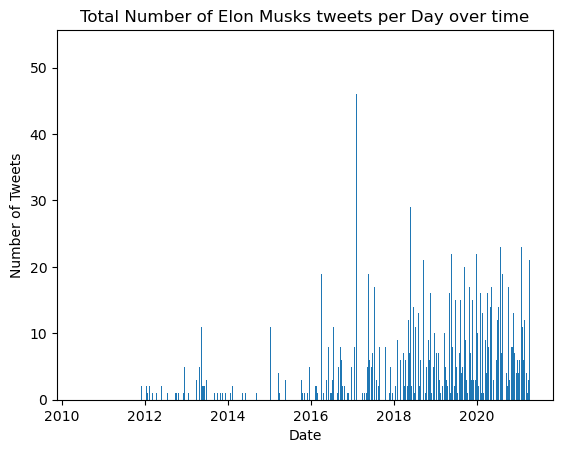

In [99]:
# group by date and get the count of values per date
tweets_counts = tweets.groupby('Date').size().reset_index(name='count')

# plot bar chart
plt.bar(tweets_counts['Date'],tweets_counts['count'])
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Total Number of Elon Musks tweets per Day over time')
plt.show()

In [100]:
print('Max number of tweets per day:',tweets_counts['count'].max(),'\nMin number of tweets per day:',tweets_counts['count'].min())

Max number of tweets per day: 53 
Min number of tweets per day: 1


In [101]:
tweets_counts.shape

(2001, 2)

In [102]:
tweets_counts.head(10)

,Date,count
0,2010-06-04,1
1,2011-12-01,2
2,2011-12-03,2
3,2011-12-04,1
4,2011-12-21,6
5,2011-12-22,4
6,2011-12-24,3
7,2011-12-26,5
8,2011-12-28,1
9,2011-12-29,4


In [103]:
tweets_counts['count'].unique()

array([ 1,  2,  6,  4,  3,  5, 10,  9,  7,  8, 12, 13, 11, 31, 14, 18, 19,
       21, 20, 16, 46, 44, 17, 15, 23, 28, 33, 30, 29, 53, 27, 26, 25, 22,
       34, 42, 41, 24, 35], dtype=int64)

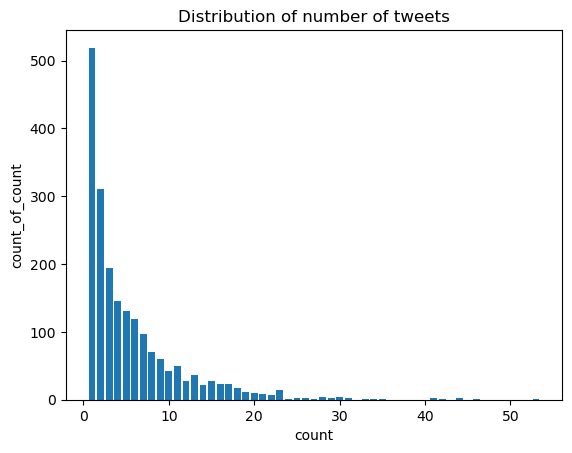

In [104]:
tweets_counts_counts = tweets_counts.groupby('count').size().reset_index(name='count_of_count')
# plot bar chart
plt.bar(tweets_counts_counts['count'],tweets_counts_counts['count_of_count'])
plt.xlabel('count')
plt.ylabel('count_of_count')
plt.title('Distribution of number of tweets')
plt.show()

In [105]:
start_date = tweets['Date'].min()
end_date = tweets['Date'].max()
start_date, end_date

(datetime.date(2010, 6, 4), datetime.date(2021, 4, 17))

In [106]:
#Number of days between the oldest and newest date
days_diff = ((end_date - start_date).days)+1
days_diff

3971

In [107]:
#number of day Elon Musk has tweeted sth
tweets['Date'].nunique()

2001

In [108]:
#number of days he tweeted nothing:
days_diff-tweets['Date'].nunique()

1970

## Adding missing dates to tweets table
In those days,  **number of tweets=0**

In [109]:
# create a time index from '2010-06-04' to '2021-04-17'
date = pd.date_range(start='2010-06-04', end='2021-04-17', freq='D')

# create a dataframe with zeros and the time index
df = pd.DataFrame(np.zeros((len(date), 1)), index=date, columns=['value'])

df = df.reset_index().rename(columns={'index': 'Date'})

# display the resulting dataframe
print(df.shape)

(3971, 2)


In [110]:
df.head(1)

,Date,value
0,2010-06-04,0.0


In [111]:
# convert 'Date' column in tweets to datetime format
tweets['Date'] = pd.to_datetime(tweets['Date'])

# perform outer join on 'Date' column
tweets_all_dates = pd.merge(df, tweets, on='Date', how='outer')

# display result
tweets_all_dates.shape

(13108, 14)

In [112]:
tweets_all_dates = tweets_all_dates.drop('value', axis=1)

In [113]:
tweets_all_dates['tweet']=tweets_all_dates['tweet'].fillna(0)

In [114]:
tweets_all_dates.head(1)

,Date,created_at,tweet,tesla_mention,tesla_in_url,replies_count,retweets_count,likes_count,link,tesla_quote,tweets_hashtags,reply_to_tesla,tweet_tesla
0,2010-06-04,2010-06-04 16:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,False,398.0,349.0,4710.0,https://twitter.com/elonmusk/status/15434727182,False,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,False


In [115]:
tweets_all_dates.shape,tweets_all_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 13107
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             13108 non-null  datetime64[ns]
 1   created_at       11138 non-null  datetime64[ns]
 2   tweet            13108 non-null  object        
 3   tesla_mention    11138 non-null  object        
 4   tesla_in_url     11138 non-null  object        
 5   replies_count    11138 non-null  float64       
 6   retweets_count   11138 non-null  float64       
 7   likes_count      11138 non-null  float64       
 8   link             11138 non-null  object        
 9   tesla_quote      11138 non-null  object        
 10  tweets_hashtags  11138 non-null  object        
 11  reply_to_tesla   11138 non-null  object        
 12  tweet_tesla      11138 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(8)
memory usage: 1.4+ MB


((13108, 13), None)

In [116]:
#saving the table
tweets_all_dates.to_csv('tweets_all_dates.csv', index=False)

## Some EDA with tweets in all dates

In [157]:
# convert 'Date' column in tweets to datetime format
tweets_counts['Date'] = pd.to_datetime(tweets_counts['Date'])


# perform outer join on 'date' column with tweets_counts table
tweets_all_date_count= pd.merge(tweets_counts,df, on='Date', how='outer')

# display result
print(tweets_all_date_count.head(1))

        Date  count  value
0 2010-06-04    1.0    0.0


In [158]:
tweets_all_date_count['count']=tweets_all_date_count['count'].fillna(0)

In [159]:
#Remove redundant col of value
tweets_all_date_count = tweets_all_date_count.drop('value', axis=1)
# Sorting values chronologically
tweets_all_date_count = tweets_all_date_count.sort_values(by='Date')
# Making time index
tweets_all_date_count = tweets_all_date_count.set_index('Date')

In [160]:
tweets_all_date_count.shape

(3971, 1)

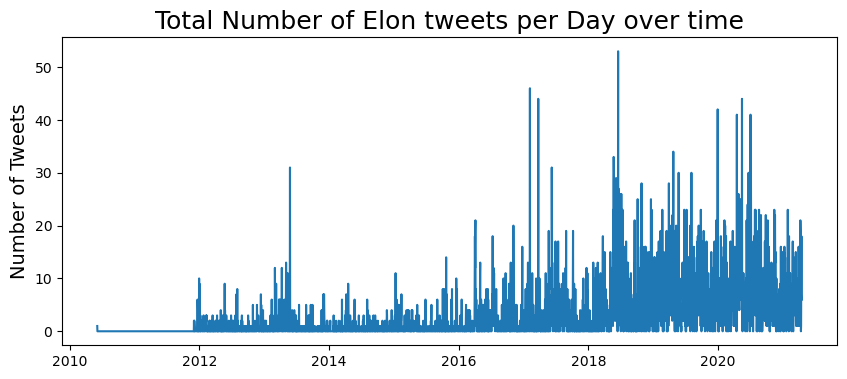

In [161]:
#tweet counts per day over time
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tweets_all_date_count)
plt.title('Total Number of Elon tweets per Day over time',fontsize=18)
ax.set_ylabel('Number of Tweets',fontsize=14)
plt.savefig('./data/daily_tweets.png')

plt.show()

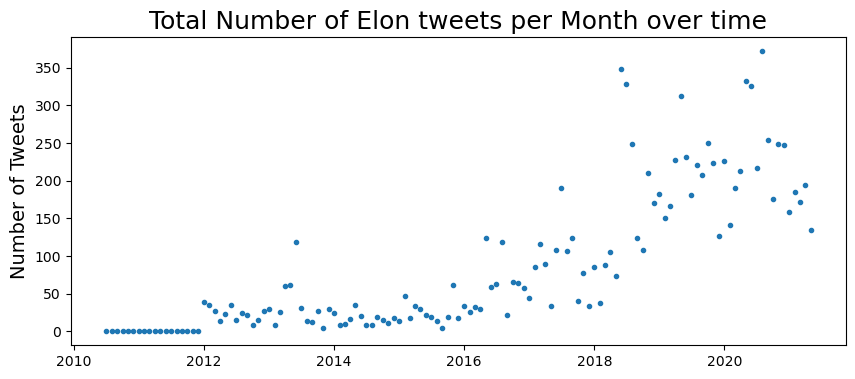

In [162]:
#tweet counts per month over time
fig, ax = plt.subplots(figsize=(10,4))

monthly_sum = tweets_all_date_count.resample('M').sum()
ax.plot(monthly_sum ,'.')

plt.title('Total Number of Elon tweets per Month over time',fontsize=18)

ax.set_ylabel('Number of Tweets',fontsize=14)

plt.savefig('./data/monthly_tweets.png')

plt.show()

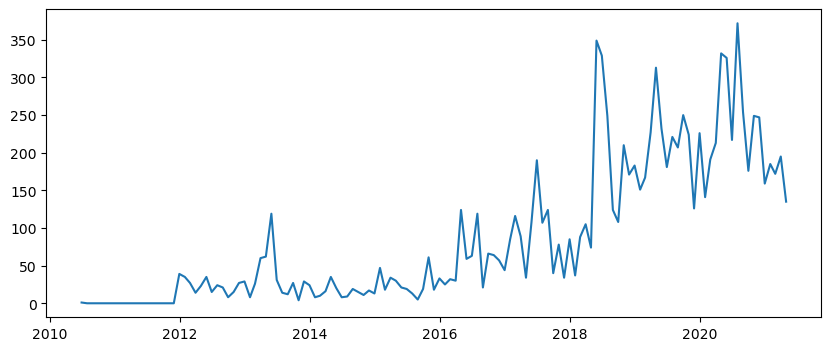

In [139]:
#tweet counts per month over time
fig, ax = plt.subplots(figsize=(10,4))

monthly_sum = tweets_all_date_count.resample('M').sum()


ax.plot(monthly_sum)

plt.show()

In [124]:
tweets_all_date_count

,count
Date,
2010-06-04,1.0
2010-06-05,0.0
2010-06-06,0.0
2010-06-07,0.0
2010-06-08,0.0
...,...
2021-04-13,1.0
2021-04-14,8.0
2021-04-15,18.0


In [125]:
%store tweets_all_date_count

Stored 'tweets_all_date_count' (DataFrame)


## Extracting a subset of tweets df that contain information about tesla

In [126]:
a=tweets[tweets['tesla_mention']]

In [127]:
b=tweets[tweets['tesla_in_url']]

In [128]:
c=tweets[tweets['tesla_quote']]

In [129]:
d=tweets[tweets['reply_to_tesla']]

In [130]:
e=tweets[tweets['tweet_tesla']]

In [131]:
tweets_abt_tesla=pd.concat([a,b,c,d,e],axis=0)

In [132]:
tweets_abt_tesla=tweets_abt_tesla.drop_duplicates()

In [133]:
tweets_abt_tesla.shape

(2651, 13)

In [134]:
tweets_abt_tesla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2651 entries, 238 to 11136
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   created_at       2651 non-null   datetime64[ns]
 1   Date             2651 non-null   datetime64[ns]
 2   tweet            2651 non-null   object        
 3   tesla_mention    2651 non-null   bool          
 4   tesla_in_url     2651 non-null   bool          
 5   replies_count    2651 non-null   int64         
 6   retweets_count   2651 non-null   int64         
 7   likes_count      2651 non-null   int64         
 8   link             2651 non-null   object        
 9   tesla_quote      2651 non-null   bool          
 10  tweets_hashtags  2651 non-null   object        
 11  reply_to_tesla   2651 non-null   bool          
 12  tweet_tesla      2651 non-null   bool          
dtypes: bool(5), datetime64[ns](2), int64(3), object(3)
memory usage: 199.3+ KB


In [135]:
tesla_tweets_grouped = tweets_abt_tesla.groupby('Date').agg(**{'tweet_hashtags': ('tweets_hashtags', lambda x: '| '.join(x)), 
                                                     'tweet_counts': ('tweet', 'count'),
                                                     'tesla_mention': ('tesla_mention', 'sum'),
                                                     'tesla_in_url': ('tesla_in_url', 'sum'),
                                                     'tesla_quote': ('tesla_quote', 'sum'),
                                                     'reply_to_tesla': ('reply_to_tesla', 'sum'),
                                                     'tweet_tesla': ('tweet_tesla', 'sum'),
                                                     'replies_count': ('replies_count', 'sum'),
                                                     'retweets_count': ('retweets_count', 'sum'), 
                                                     'likes_count': ('likes_count', 'sum'), 
            
                                 
                                      })


In [136]:
tesla_tweets_grouped['engagement']=tesla_tweets_grouped[['replies_count', 'retweets_count','likes_count']].sum(axis=1)

In [137]:
tesla_tweets_grouped=tesla_tweets_grouped.drop(columns=['tesla_mention','tesla_in_url','tesla_quote','reply_to_tesla','tweet_tesla','replies_count','retweets_count','likes_count'])

In [138]:
tesla_tweets_grouped.to_csv('tesla_tweets_grouped.csv')